In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I HAVE TAKE THIS DATASET FROM KAGGLE

In [2]:
dataset = pd.read_csv('WineQT.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
print(dataset)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [5]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

EXPLORARTORY ANALYSIS OF DATASET


In [6]:
print(dataset.shape)

(1143, 13)


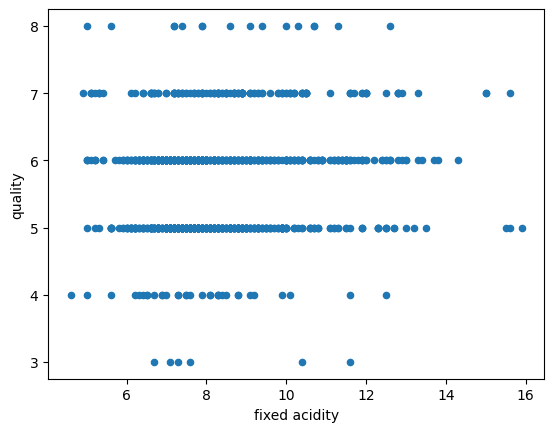

In [7]:
dataset.plot.scatter(x="fixed acidity",y="quality")
plt.show()

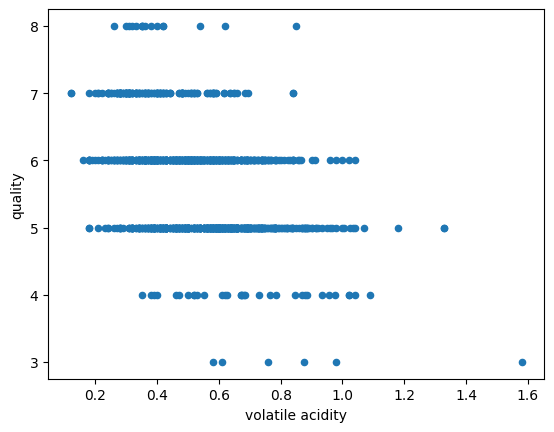

In [8]:
dataset.plot.scatter(x="volatile acidity",y="quality")
plt.show()

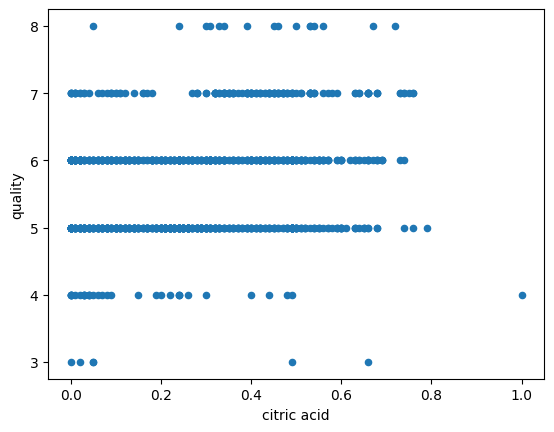

In [9]:
dataset.plot.scatter(x="citric acid",y="quality")
plt.show()

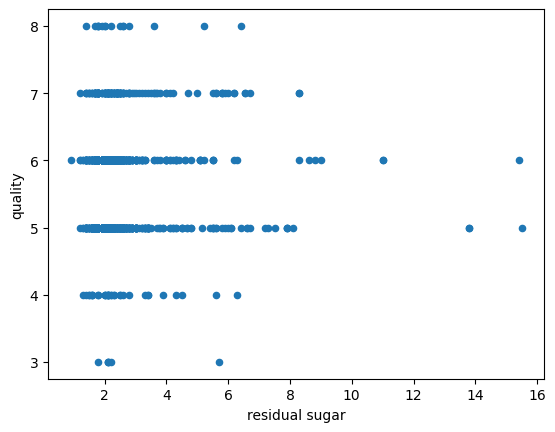

In [10]:
dataset.plot.scatter(x="residual sugar",y="quality")
plt.show()

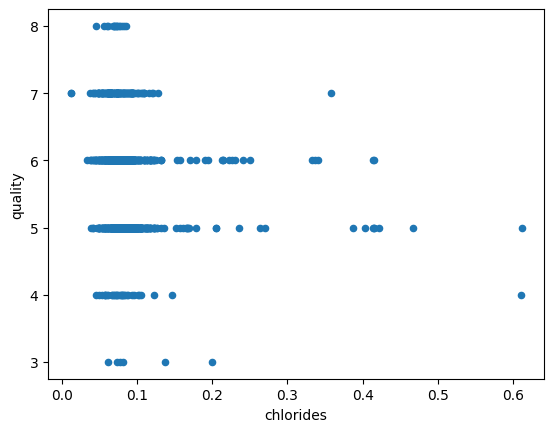

In [11]:
dataset.plot.scatter(x="chlorides",y="quality")
plt.show()

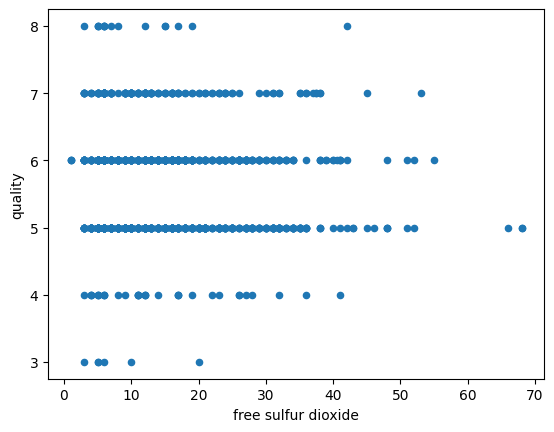

In [12]:
dataset.plot.scatter(x="free sulfur dioxide",y="quality")
plt.show()

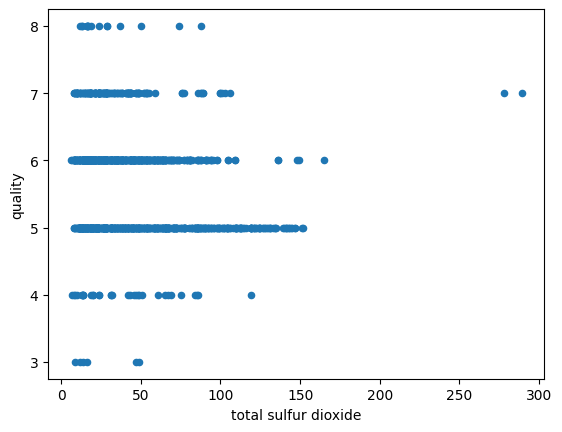

In [13]:
dataset.plot.scatter(x="total sulfur dioxide",y="quality")
plt.show()

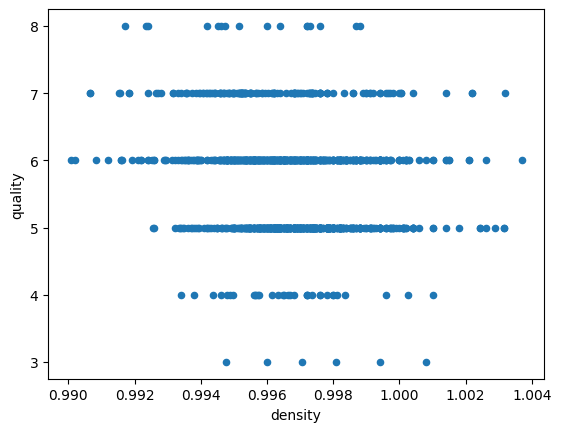

In [14]:
dataset.plot.scatter(x="density",y="quality")
plt.show()

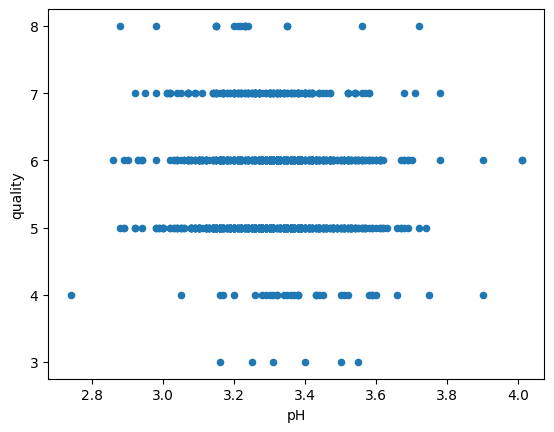

In [15]:
dataset.plot.scatter(x="pH",y="quality")
plt.show()

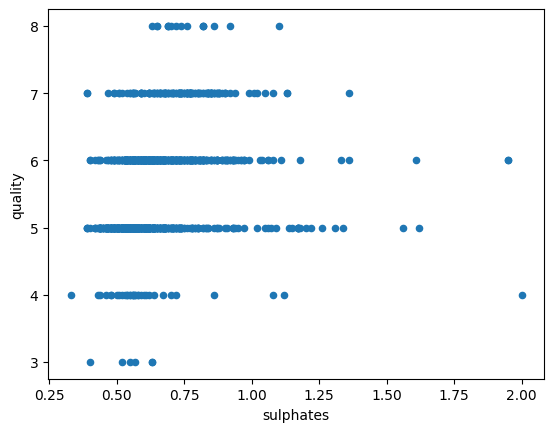

In [16]:
dataset.plot.scatter(x="sulphates",y="quality")
plt.show()

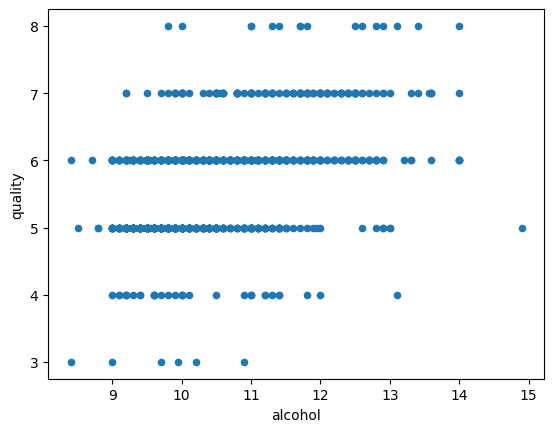

In [17]:
dataset.plot.scatter(x="alcohol",y="quality")
plt.show()

In [18]:
dataset.drop(columns='Id',axis=1,inplace=True)

In [19]:
print(dataset.shape)

(1143, 12)


In [20]:
# dataset.drop(columns='quality',axis=1,inplace=True)

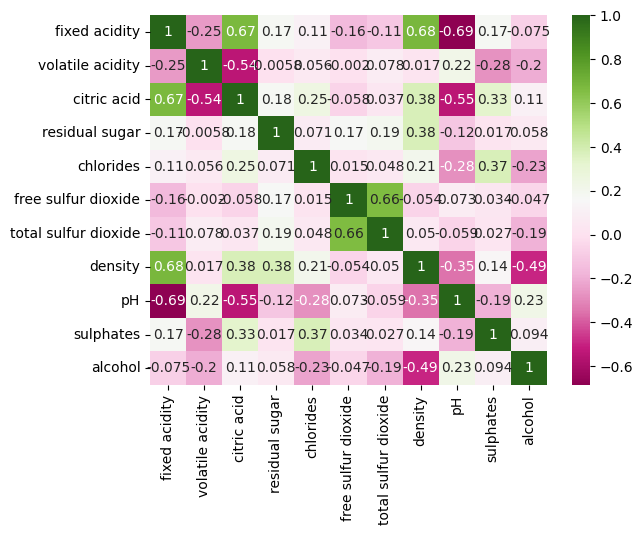

In [21]:
dataset[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].corr()
sns.heatmap(dataset[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].corr(), annot=True,cmap="PiYG")
plt.show()

In [22]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [23]:
print(x)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.2    0.6    0.08  ...  3.45   0.58  10.5  ]
 [ 5.9    0.55   0.1   ...  3.52   0.76  11.2  ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]]


In [24]:
print(y)

[5 5 5 ... 5 6 5]


SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [26]:
print(x_train.shape)

(914, 11)


In [27]:
print(x_test.shape)

(229, 11)


STANDARDISATION OF DATA

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,10:] = sc.fit_transform(x_train[:,10:])
x_test[:,10:] = sc.transform(x_test[:,10:])

In [29]:
print(x_train)

[[ 6.1         0.6         0.08       ...  3.38        0.54
   0.48375412]
 [10.8         0.32        0.44       ...  3.22        0.78
  -0.42446484]
 [ 8.9         0.4         0.32       ...  3.38        0.77
   0.02964464]
 ...
 [ 9.8         0.39        0.43       ...  3.19        0.46
   0.8470417 ]
 [ 7.1         0.52        0.03       ...  3.5         0.6
  -0.60610864]
 [ 8.8         0.33        0.41       ...  3.3         0.62
   1.48279498]]


In [30]:
print(x_test)

[[ 9.1         0.775       0.22       ...  3.18        0.51
  -0.78775243]
 [ 6.9         1.09        0.06       ...  3.51        0.43
   0.8470417 ]
 [ 9.1         0.76        0.68       ...  2.9         1.33
  -1.24186191]
 ...
 [ 8.9         0.38        0.4        ...  3.27        0.75
   1.93690446]
 [ 9.3         0.655       0.26       ...  3.25        0.42
  -0.78775243]
 [ 8.8         0.64        0.17       ...  3.23        0.54
  -0.78775243]]


TRAINING OF MODEL

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred = regressor.predict(x_test)

MODEL PREDICTION

In [33]:
print(y_pred)

[5.05358553 5.06648398 5.37430252 5.3755695  5.39329775 5.81034075
 5.4517463  6.03941079 6.16211749 6.61405119 4.61122692 5.96225727
 5.29018376 5.37982581 6.26840468 4.9708843  5.63158414 5.42642599
 4.91132945 5.01604847 6.30437274 5.17302712 5.35294136 5.46378356
 5.1425701  5.31299727 5.3721858  6.03941079 5.83307639 5.37709758
 5.28281619 5.88186503 5.82427432 6.1853763  5.86315152 5.42417338
 5.59656758 5.72059914 5.17930207 5.72229687 5.39734612 6.16488559
 5.4631317  6.10783929 5.03175565 5.36732962 5.3394324  6.2203096
 6.44150066 6.05304819 5.38980428 5.98468648 5.60146376 6.40342216
 5.41584762 5.38414056 5.51337518 5.61990479 4.43989205 5.75591195
 5.5659647  5.05484806 5.78530667 5.31238537 5.3326219  5.31782774
 6.47531509 5.16141862 5.49461703 5.62550689 4.90285009 5.73481324
 5.58245951 6.18583738 6.01759942 6.46813681 6.11617298 6.30366378
 5.35160975 6.12172024 5.05484806 5.06823661 5.84744732 5.46989234
 6.27879694 5.46473751 5.41820064 5.04653867 5.22154901 5.80949

In [34]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.09736459e-03 -1.13185597e+00 -1.30770013e-01  1.20731764e-02
 -1.36765540e+00  3.46636091e-03 -3.25149225e-03 -1.07458609e+01
 -4.17236034e-01  1.05377321e+00  2.93333311e-01]
17.82234751354725


In [35]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5.05 5.  ]
 [5.07 4.  ]
 [5.37 6.  ]
 [5.38 6.  ]
 [5.39 5.  ]
 [5.81 6.  ]
 [5.45 5.  ]
 [6.04 6.  ]
 [6.16 6.  ]
 [6.61 7.  ]
 [4.61 5.  ]
 [5.96 6.  ]
 [5.29 6.  ]
 [5.38 5.  ]
 [6.27 6.  ]
 [4.97 6.  ]
 [5.63 6.  ]
 [5.43 6.  ]
 [4.91 5.  ]
 [5.02 5.  ]
 [6.3  6.  ]
 [5.17 5.  ]
 [5.35 7.  ]
 [5.46 6.  ]
 [5.14 5.  ]
 [5.31 5.  ]
 [5.37 5.  ]
 [6.04 6.  ]
 [5.83 6.  ]
 [5.38 5.  ]
 [5.28 6.  ]
 [5.88 5.  ]
 [5.82 5.  ]
 [6.19 6.  ]
 [5.86 5.  ]
 [5.42 6.  ]
 [5.6  6.  ]
 [5.72 4.  ]
 [5.18 5.  ]
 [5.72 6.  ]
 [5.4  5.  ]
 [6.16 6.  ]
 [5.46 6.  ]
 [6.11 6.  ]
 [5.03 5.  ]
 [5.37 5.  ]
 [5.34 5.  ]
 [6.22 7.  ]
 [6.44 8.  ]
 [6.05 6.  ]
 [5.39 6.  ]
 [5.98 5.  ]
 [5.6  5.  ]
 [6.4  7.  ]
 [5.42 5.  ]
 [5.38 5.  ]
 [5.51 5.  ]
 [5.62 5.  ]
 [4.44 5.  ]
 [5.76 6.  ]
 [5.57 6.  ]
 [5.05 5.  ]
 [5.79 6.  ]
 [5.31 5.  ]
 [5.33 6.  ]
 [5.32 5.  ]
 [6.48 6.  ]
 [5.16 5.  ]
 [5.49 5.  ]
 [5.63 7.  ]
 [4.9  5.  ]
 [5.73 5.  ]
 [5.58 6.  ]
 [6.19 7.  ]
 [6.02 6.  ]
 [6.47 7.  ]
 [6.12 6.  ]

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error", mse)
print("R2 Score", r2)

Mean Squared Error 0.36087467144893637
R2 Score 0.408457469196872


VISUALISATION THROUGH GRAPH IS NOT POSSIBLE BECAUSE THERE ARE MORE THAN ONE ATTRIBUTE